In [1]:
import numpy as np 
import scipy.optimize as op
import sklearn.model_selection as ms
import matplotlib.pyplot as plt

In [2]:
def sigmoid(X):                         
    return 1 / (1 + np.exp(-X))

In [3]:
def cost_func(theta, X, y, lamb):   #Cost function
    
    m = X.shape[0]
    z = np.dot(X ,theta)
    h = sigmoid(z)
    
    term1 = (-y) * np.log(h) 
    term2 = (1 - y) * np.log(1 - h)
    
    J = (1/m) * np.sum(term1 - term2)
    J = J + (lamb/(2 * m)) * (np.sum(theta * theta)   #Regularization term        
        - (theta[0] * theta[0]))                                    
    
    return J

In [4]:
def grad(theta, X, y, lamb):    #Gradient function
    
    m = X.shape[0]
    z = np.dot(X, theta)
    h = sigmoid(z)
    
    diff = h - y
    mat = np.dot(X.T ,diff)
    
    G = (1/m) * mat

    temp = G[0]                     #Not regularizing the constant term
    G = G + ((lamb/m) * theta)      #Regularization term
    G[0] = temp
        
    return G

In [6]:
fname = "heart_data.csv"                      
data = np.loadtxt(fname, delimiter=",")  #Read dataset into an nparray  

data = data[~np.isnan(data).any(axis=1)]

m , n = data.shape

X = data[:, 0:n-1]  #Feature matrix
y = data[:, n-1]    #Target variable

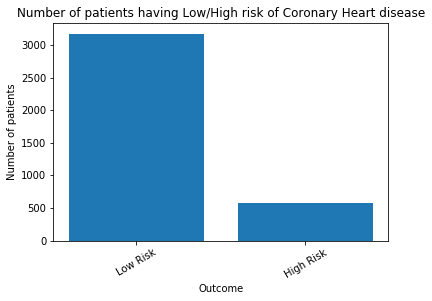

In [7]:
label = ['Low Risk', 'High Risk']
no_of_patients = [m - np.sum(y), np.sum(y)]
index = [0, 1]
plt.bar(index, no_of_patients)
plt.xlabel('Outcome')
plt.ylabel('Number of patients')
plt.xticks(index, label, rotation=30)
plt.title('Number of patients having Low/High risk of Coronary Heart disease')
plt.show()

In [9]:
meanX = np.mean(X, axis = 0)    
stdX = np.std(X, axis = 0)

for i in range(1,n-1):
    X[:, i] = (X[:, i] - meanX[i])/(stdX[i])    #Feature scaling

X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size = 0.33, random_state = 200   ) #Dividing data into training and testing part

In [10]:
lamb = 50    #Regularization constant
m , n = X.shape
initial_theta = np.zeros(n)

Result = op.minimize(fun = cost_func, x0 = initial_theta,
                     args = (X_train, y_train, lamb), method = 'TNC', jac = grad) #Minimizing Cost Function using Gradient Descent 

opt_theta = Result.x
print("Optimal Parameters obtained: \n", opt_theta)

Optimal Parameters obtained: 
 [-1.97339353e+00  3.09292306e-01  4.97588847e-01 -4.97068629e-03
  1.82886349e-01  5.21349362e-02  1.12234924e-01  1.06613536e-01
 -9.23243309e-03  1.13970001e-01  2.53009340e-01  3.95581916e-02
  3.41350744e-02 -1.40781495e-03  1.27057945e-01]


In [11]:
y_pred = np.dot(X_test, opt_theta)

err = 0
nerr = 0

m1 = y_pred.shape[0]

for i in range(m1):
    diff = y_pred[i]
    
    if (diff >= 0.5):
        y_pred[i] = 1
        
    else:
        y_pred[i] = 0
    
    if (y_pred[i] != y_test[i]):
        err = err + 1
        
    else:
        nerr = nerr + 1

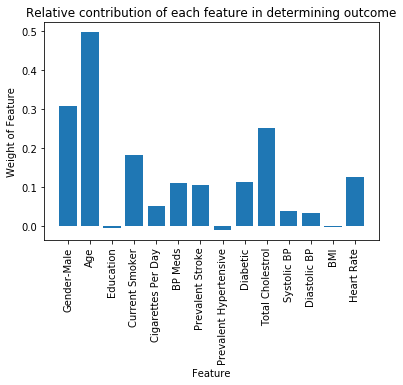

In [12]:
#Plotting contribution of each feature in detemining outcome

label = [ 'Gender-Male' , 'Age' , 'Education' , 'Current Smoker' , 'Cigarettes Per Day' , 'BP Meds' , 'Prevalent Stroke' , 'Prevalent Hypertensive' , 'Diabetic' , 'Total Cholestrol' , 'Systolic BP' , 'Diastolic BP' , 'BMI' , 'Heart Rate' , 'Glucose' ]
index = np.arange(n-1)
plt.bar(index, opt_theta[1:n])
plt.xlabel('Feature')
plt.ylabel('Weight of Feature')
plt.xticks(index, label, rotation=90)
plt.title('Relative contribution of each feature in determining outcome')
plt.show()

In [13]:
print("\n Conclusions from the graph: \n")
print("- Odds of getting diagnosed with heart disease is higher in males than in females.\n")
print("- Increase in age and Total Cholestrol also show increasing odds of having heart disease.\n")

print("\n Accuracy Obtained (%): \n", (nerr/(nerr+err))*100)    


 Conclusions from the graph: 

- Odds of getting diagnosed with heart disease is higher in males than in females.

- Increase in age and Total Cholestrol also show increasing odds of having heart disease.


 Accuracy Obtained (%): 
 84.49111470113085
